In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


C:\Users\alejandro.regueiroru\AppData\Local\Temp\ipykernel_11032\3418012438.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sexo'] = df['Sexo'].replace('Mujer', 1)


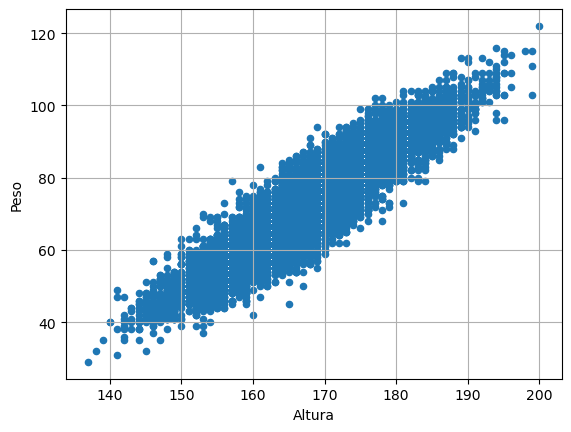

In [5]:
df = pd.DataFrame()
df = pd.read_csv('../CSV/peso_altura.csv')

# Modificar columan de sexo a numerico homre=0, mujer=1
df['Sexo'] = df['Sexo'].replace('Hombre', 0)
df['Sexo'] = df['Sexo'].replace('Mujer', 1)

# Aleatorizamos el dataframe
df = df.sample(frac=1)

X = df[['Altura']]
y = df[['Peso']]

# Visualiza los datos con un diagrama
df.plot(kind='scatter', grid=True,
             x="Altura", y="Peso")
plt.show()

df

# Creamos los conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

X_test2 = X_test.sample(frac=1)

# Creamos el modelo de regresion lineal
regressor = LinearRegression()

In [ ]:
# Entrenamos el modelo
regressor.fit(X_train, y_train)

# mostramos los coeficientes de la recta
print(regressor.intercept_)
print(regressor.coef_)

# Predecimos los valores de test y guardamos en un dataframe
y_pred = regressor.predict(X_test)

show_df = pd.DataFrame({'Altura': X_test['Altura'].values.flatten(), 'Real': y_test.values.flatten(), 'Prediccion': y_pred.flatten()})

show_df.head(50)



In [9]:

# Añadimos la columna de sexo a las características
X = df[['Altura', 'Sexo']]

# Creamos los conjuntos de entrenamiento y test con la nueva característica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Entrenamos el modelo de regresión lineal con la nueva característica
regressor.fit(X_train, y_train)

# Mostramos los coeficientes de la recta
print(regressor.intercept_)
print(regressor.coef_)

# Predecimos los valores de test y creamos un dataframe con los datos originales sexo, altura y peso, y la predicción
y_pred = regressor.predict(X_test)

show_df = pd.DataFrame({'Sexo': X_test['Sexo'].values.flatten(), 'Altura': X_test['Altura'].values.flatten(), 'Real': y_test.values.flatten(), 'Prediccion': y_pred.flatten()})

# Modificamos la columna de sexo para que vuelva a ser texto
show_df['Sexo'] = show_df['Sexo'].replace(0, 'Hombre')
show_df['Sexo'] = show_df['Sexo'].replace(1, 'Mujer')


# Extraemos los valores de peso predichos y los guardamos en una variable
pesoPreditc = y_pred.flatten()

show_df.head(50)

[-103.28952381]
[[ 1.07344621 -8.80063504]]


,Sexo,Altura,Real,Prediccion
0,Hombre,186,101,96.371471
1,Hombre,172,79,81.343224
2,Mujer,163,61,62.881573
3,Mujer,172,72,72.542589
4,Hombre,172,87,81.343224
5,Hombre,184,92,94.224578
6,Hombre,174,88,83.490116
7,Mujer,163,60,62.881573
8,Mujer,176,73,76.836374
9,Mujer,163,66,62.881573


In [ ]:
# Vamos a usar el valor de peso predicho para calcular el índice de masa corporal (IMC) y guardarlo en una nueva columna

# Creamo un dataframe que contenga una columna con el peso predicho otra con la altura
dfIMC = pd.DataFrame({'Sexo': X_test['Sexo'].values.flatten(),'Peso': pesoPreditc,'Altura': X_test['Altura'].values.flatten()})

# Calculamos el IMC
dfIMC['IMC'] = dfIMC['Peso'] / (dfIMC['Altura'] ** 2)

dfIMC

# Entrenamos el modelo de regresión lineal con la nueva característica
X = dfIMC[['Altura', 'Sexo', 'IMC']]

regressor.fit(X, y_train)

# Predecimos los valores de test y creamos un dataframe con los datos originales sexo, altura y peso, y la predicción
y_pred = regressor.predict(X_test)

show_df = pd.DataFrame({'Sexo': X_test['Sexo'].values.flatten(), 'Altura': X_test['Altura'].values.flatten(), 'Real': y_test.values.flatten(), 'Prediccion': y_pred.flatten()})

# Modificamos la columna de sexo para que vuelva a ser texto
show_df['Sexo'] = show_df['Sexo'].replace(0, 'Hombre')
show_df['Sexo'] = show_df['Sexo'].replace(1, 'Mujer')


# Extraemos los valores de peso predichos y los guardamos en una variable
pesoPreditc = y_pred.flatten()


ValueError: All arrays must be of the same length